# Assignment for different Data Sets
## iris Data set
## Cat vs Dog
## Family classification
## Mumy Vs Papa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = './data/iris.data.csv'
df = pd.read_csv(path)

In [3]:

df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
5.1            149 non-null float64
3.5            149 non-null float64
1.4            149 non-null float64
0.2            149 non-null float64
Iris-setosa    149 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
df.columns = ['p1','p2','p3','p4','class']
df.head()

,p1,p2,p3,p4,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
df.describe()

,p1,p2,p3,p4
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
l1 = df['class']
l1.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
dic = {
    'Iris-setosa':1,
    'Iris-versicolor':2,
    'Iris-virginica':3,
}


In [9]:
dic

{'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}

In [10]:
df['class_num'] = df['class'].map(dic)
df.head()

,p1,p2,p3,p4,class,class_num
0,4.9,3.0,1.4,0.2,Iris-setosa,1
1,4.7,3.2,1.3,0.2,Iris-setosa,1
2,4.6,3.1,1.5,0.2,Iris-setosa,1
3,5.0,3.6,1.4,0.2,Iris-setosa,1
4,5.4,3.9,1.7,0.4,Iris-setosa,1


In [11]:
df.class_num.value_counts()

3    50
2    50
1    49
Name: class_num, dtype: int64

In [12]:
data = df[['p1','p2','p3','p4','class_num']]
data.head()

,p1,p2,p3,p4,class_num
0,4.9,3.0,1.4,0.2,1
1,4.7,3.2,1.3,0.2,1
2,4.6,3.1,1.5,0.2,1
3,5.0,3.6,1.4,0.2,1
4,5.4,3.9,1.7,0.4,1


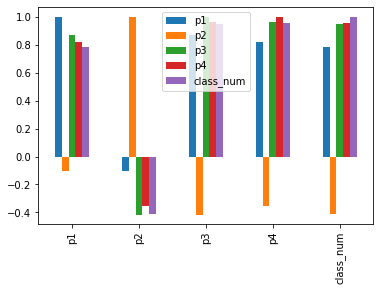

In [13]:
import matplotlib.pyplot as plt
data.corr().plot(kind = 'bar')

In [14]:
X = data.loc[:,'p1':'p4']
#X = X.sample(frac= 1)
X.head()

,p1,p2,p3,p4
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [15]:
y = data['class_num']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class_num, dtype: int64

In [16]:
#y = df['class_num']
#y = y.sample(frac=1)
y = pd.get_dummies(y)
y.head()


,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [17]:
y.drop_duplicates()

,1,2,3
0,1,0,0
49,0,1,0
99,0,0,1


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

model = Sequential()
model.add(Dense(64, activation = 'tanh' , input_shape =(4,)))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(16, activation = 'tanh'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(3, activation = 'softmax'))

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 27        
Total params: 3,091
Trainable params: 3,091
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer = SGD( lr = 0.02),
              loss      = ('categorical_crossentropy'),
              metrics   = ['acc'])


In [39]:
history = model.fit(X,y,epochs = 30, batch_size= 25)

Epoch 1/30
6/6 [==============================] - 0s 5ms/step - loss: 0.2737 - acc: 0.8993
Epoch 2/30
6/6 [==============================] - 0s 13ms/step - loss: 0.2090 - acc: 0.9530
Epoch 3/30
6/6 [==============================] - 0s 8ms/step - loss: 0.1962 - acc: 0.9799
Epoch 4/30
6/6 [==============================] - 0s 8ms/step - loss: 0.2445 - acc: 0.9195
Epoch 5/30
6/6 [==============================] - 0s 16ms/step - loss: 0.4476 - acc: 0.7651
Epoch 6/30
6/6 [==============================] - 0s 24ms/step - loss: 0.2916 - acc: 0.8926
Epoch 7/30
6/6 [==============================] - 0s 8ms/step - loss: 0.1816 - acc: 0.9866
Epoch 8/30
6/6 [==============================] - ETA: 0s - loss: 0.1868 - acc: 0.980 - 0s 13ms/step - loss: 0.2467 - acc: 0.9262
Epoch 9/30
6/6 [==============================] - 0s 12ms/step - loss: 0.2181 - acc: 0.9262
Epoch 10/30
6/6 [==============================] - 0s 11ms/step - loss: 0.1767 - acc: 0.9799
Epoch 11/30
6/6 [============================

history_dict = model.model
history_dict.keys()


In [40]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'acc'])

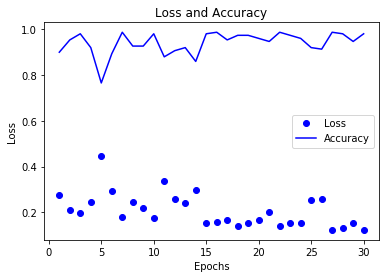

In [42]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values  = history_dict['loss']
acc_values  = history_dict['acc']
epochs = range(1,len(history_dict['acc']) + 1)

plt.plot(epochs,loss_values,'bo',label = 'Loss')
plt.plot(epochs,acc_values_values,'b',label = 'Accuracy')
plt.title('Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [44]:
max(history_dict['loss'])

0.4475676119327545

In [45]:
max(history_dict['acc'])

0.9865771532058716